<center>

| Nazwa przedmiotu | Dataset |
|----------|----------|
| WSB | laptop_prices_dataset |
| | |
| Piotr  | Goraj |
|Numer albumu | 55529 |
| | |
| Bartosz | Kiałka |
|Numer albumu | 555 |
| | |
| Data wykonania ćwiczenia    |  |
| Data oddania sprawozdania   |  |
| Kierunek | Informatyka, II stopnia P, Stacjonarne |

</center>


# 1. Instalacja potrzebnych bibliotek

In [72]:
#!pip install pandas
#!pip install scikit-learn
#!pip install numpy
!pip install shap


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: C:\Users\Barto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# 2. Odczyt danych

In [73]:
import pandas as pd

# załadowanie pliku CSV
FILE_PATH = './laptop_prices_dataset.csv'
data = pd.read_csv(FILE_PATH)


In [74]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [75]:
# pierwsze trzy rekordy
data.head(3)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620


In [76]:
# Podsumowanie statystyczne
print(data.describe())

            Inches          Ram       Weight  Price_euros      ScreenW  \
count  1275.000000  1275.000000  1275.000000  1275.000000  1275.000000   
mean     15.022902     8.440784     2.040525  1134.969059  1900.043922   
std       1.429470     5.097809     0.669196   700.752504   493.346186   
min      10.100000     2.000000     0.690000   174.000000  1366.000000   
25%      14.000000     4.000000     1.500000   609.000000  1920.000000   
50%      15.600000     8.000000     2.040000   989.000000  1920.000000   
75%      15.600000     8.000000     2.310000  1496.500000  1920.000000   
max      18.400000    64.000000     4.700000  6099.000000  3840.000000   

           ScreenH     CPU_freq  PrimaryStorage  SecondaryStorage  
count  1275.000000  1275.000000     1275.000000       1275.000000  
mean   1073.904314     2.302980      444.517647        176.069020  
std     283.883940     0.503846      365.537726        415.960655  
min     768.000000     0.900000        8.000000          0.00

In [77]:
# wartości null

display(data.isnull().sum())

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [78]:
# Wybrane kolumny
selected_columns = [ 'Company','TypeName', 'Price_euros', 'Inches','Ram','OS','Touchscreen','CPU_company','CPU_freq','CPU_model','GPU_company','GPU_model']

# Wczytanie pliku CSV z wybranymi kolumnami
print("Wybrane kolumny CSV:")
df_selected_columns_csv = pd.read_csv(FILE_PATH, usecols=selected_columns)
display(df_selected_columns_csv.head(10))

Wybrane kolumny CSV:


,Company,TypeName,Inches,Ram,OS,Price_euros,Touchscreen,CPU_company,CPU_freq,CPU_model,GPU_company,GPU_model
0,Apple,Ultrabook,13.3,8,macOS,1339.69,No,Intel,2.3,Core i5,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,8,macOS,898.94,No,Intel,1.8,Core i5,Intel,HD Graphics 6000
2,HP,Notebook,15.6,8,No OS,575.00,No,Intel,2.5,Core i5 7200U,Intel,HD Graphics 620
3,Apple,Ultrabook,15.4,16,macOS,2537.45,No,Intel,2.7,Core i7,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.3,8,macOS,1803.60,No,Intel,3.1,Core i5,Intel,Iris Plus Graphics 650
5,Acer,Notebook,15.6,4,Windows 10,400.00,No,AMD,3.0,A9-Series 9420,AMD,Radeon R5
6,Apple,Ultrabook,15.4,16,Mac OS X,2139.97,No,Intel,2.2,Core i7,Intel,Iris Pro Graphics
7,Apple,Ultrabook,13.3,8,macOS,1158.70,No,Intel,1.8,Core i5,Intel,HD Graphics 6000
8,Asus,Ultrabook,14.0,16,Windows 10,1495.00,No,Intel,1.8,Core i7 8550U,Nvidia,GeForce MX150
9,Acer,Ultrabook,14.0,8,Windows 10,770.00,No,Intel,1.6,Core i5 8250U,Intel,UHD Graphics 620


# 3. Przygotowanie danych do modelu

In [79]:
import pandas as pd
import numpy as np
import re

def replace_with_top_n(column: str, n: int, other_label: str ="Other"):
    """
    Zamienia wartości w kolumnie na n najczęściej występujących,
    a pozostałe wartości na 'Other'.
    
    Params:
    - column: Nazwa kolumny do przetworzenia.
    - n: Liczba najczęściej występujących wartości, które mają zostać zachowane.
    - other_label: Etykieta dla pozostałych wartości (domyślnie "Other").

    Returns:
    - DataFrame z przekształconą kolumną.
    """
     # Znajdź top N wartości w kolumnie
    top_n = df_selected_columns_csv[column].value_counts().nlargest(n).index
    # Przekształć kolumnę: top N wartości pozostają, reszta staje się 'Other'
    df_selected_columns_csv[column] = df_selected_columns_csv[column].apply(lambda x: x if x in top_n else other_label)
    return df_selected_columns_csv

def replace_with_log_transformation(column: str):
    """
    Zamienia wartości w kolumnie na wartości zlogarytmowane.

    Params:
    - column: Nazwa kolumny do przetworzenia.
    """
    df_selected_columns_csv[column] = np.log1p(df_selected_columns_csv[column])

def remove_model_number(column: str):
    """
    Usuwa końcowe cyfry (model) z nazwy, pozostawiając tylko część tekstową.
    
    Parameters:
    - text (str): Tekst do przetworzenia (np. "Core i5 7200U").
    
    Returns:
    - str: Przetworzony tekst bez końcowych cyfr (np. "Core i5").
    """
    df_selected_columns_csv[column] = df_selected_columns_csv[column].apply(lambda text: re.sub(r'\s+\d+\w*$', '', text))

In [80]:
# top 5 Company
replace_with_top_n('Company', 5)

# top 3 TypeName
replace_with_top_n('TypeName', 3)

# top 4 OS
replace_with_top_n('OS', 4)

# top 2 CPU_company
replace_with_top_n('CPU_company', 2)

# Top 5 CPU_model
remove_model_number('CPU_model')
replace_with_top_n('CPU_model', 5)

# Top 5 GPU_company
replace_with_top_n('GPU_company', 5)

# Top 5 GPU_model
remove_model_number('GPU_model')
replace_with_top_n('GPU_model', 5)

"""
"""

# Transformacja logarytmiczna Ram
replace_with_log_transformation('Ram')

# Transformacja logarytmiczna Price_euros
replace_with_log_transformation('Price_euros')

# Transformacja logarytmiczna Inches
replace_with_log_transformation('Inches')

# Transformacja logarytmiczna CPU_freq
replace_with_log_transformation('CPU_freq')



In [81]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Encoding categorical variables
data_encoded = df_selected_columns_csv.copy()
label_encoders = {}

# Convert categorical columns to numeric using Label Encoding for simplicity
for col in data_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le  # Store the label encoder for potential future use

# # Step 2: Scaling numeric columns
# scaler = StandardScaler()
# numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns
# data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])

# Check the first few rows of the processed data
data_encoded.head(20)


,Company,TypeName,Inches,Ram,OS,Price_euros,Touchscreen,CPU_company,CPU_freq,CPU_model,GPU_company,GPU_model
0,5,3,2.660260,2.197225,2,7.200940,0,1,1.193922,3,2,3
1,5,3,2.660260,2.197225,2,6.802328,0,1,1.029619,3,2,2
2,3,1,2.809403,2.197225,1,6.356108,0,1,1.252763,3,2,2
3,5,3,2.797281,2.833213,2,7.839309,0,1,1.308333,4,0,3
4,5,3,2.660260,2.197225,2,7.498094,0,1,1.410987,3,2,3
5,0,1,2.809403,1.609438,3,5.993961,0,0,1.386294,5,0,3
6,5,3,2.797281,2.833213,2,7.669014,0,1,1.163151,4,2,3
7,5,3,2.660260,2.197225,2,7.055917,0,1,1.029619,3,2,2
8,1,3,2.708050,2.833213,3,7.310550,0,1,1.029619,4,3,3
9,0,3,2.708050,2.197225,3,6.647688,0,1,0.955511,3,2,5


# 4. Zapis przygotowanych danych do pliku

In [82]:
data_encoded.to_csv('model_data.csv', index=False)

## Import bibliotek

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score
import shap
import matplotlib.pyplot as plt

## Model predykcyjny - Regresja

Wynik R2 dla modelu regresji: 0.7201348553928684


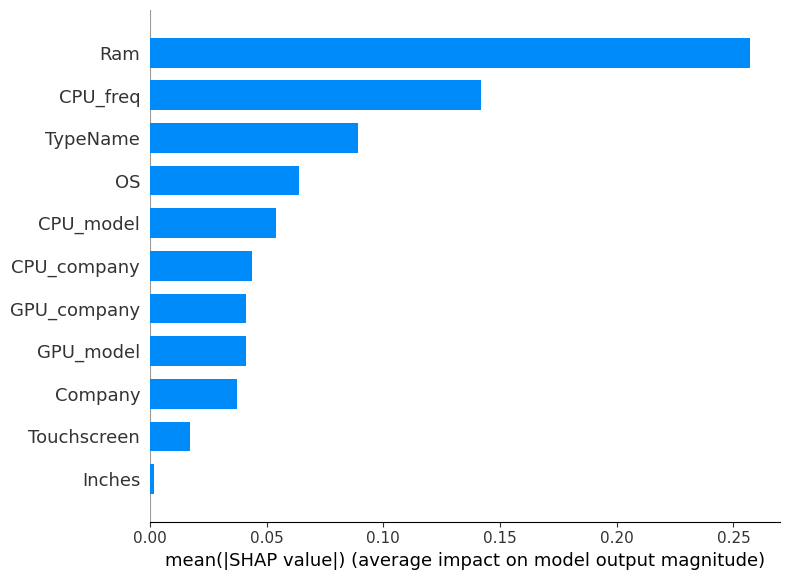

<Figure size 1000x600 with 0 Axes>

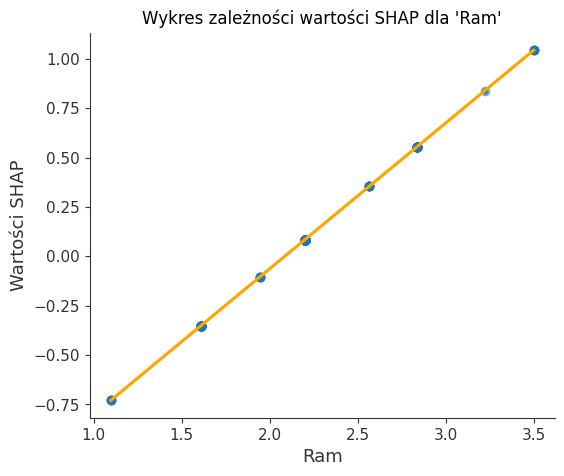

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

# Przygotowanie danych do regresji
X_regression = data_encoded.drop(columns=['Price_euros'])  # Wszystkie kolumny oprócz ceny
y_regression = data_encoded['Price_euros']  # Cena laptopów

# Podział danych na zbiory treningowy i testowy
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

# Tworzenie i trenowanie modelu regresji liniowej
regression_model = LinearRegression()
regression_model.fit(X_train_reg, y_train_reg)

# Predykcja na zbiorze testowym
y_pred_reg = regression_model.predict(X_test_reg)

# Obliczenie współczynnika determinacji R^2
print("Wynik R2 dla modelu regresji:", r2_score(y_test_reg, y_pred_reg))

# Tworzenie wyjaśniacza SHAP dla modelu regresji liniowej
regression_explainer = shap.LinearExplainer(regression_model, X_train_reg)
regression_shap_values = regression_explainer.shap_values(X_test_reg)

# Wykres sumaryczny wartości SHAP
shap.summary_plot(regression_shap_values, X_test_reg, plot_type="bar")
plt.show()

# Wykres zależności dla cechy 'Ram'
plt.figure(figsize=(10, 6))
shap.dependence_plot(
    "Ram", regression_shap_values, X_test_reg,
    interaction_index=None, show=False
)

# Dodanie stylizacji i linii trendu
plt.title("Wykres zależności wartości SHAP dla 'Ram'")
plt.xlabel("Ram")
plt.ylabel("Wartości SHAP")

# Opcjonalnie: dodanie trendu regresji (regplot z seaborn)
sns.regplot(x=X_test_reg['Ram'], y=regression_shap_values[:, X_test_reg.columns.get_loc("Ram")], 
            scatter_kws={'alpha':0.5}, line_kws={"color": "orange"}, ci=None)

plt.show()


In [ ]:
!pip install --upgrade shap scikit-learn pandas numpy matplotlib




  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 32] Proces nie może uzyskać dostępu do pliku, ponieważ jest on używany przez inny proces: 'c:\\users\\barto\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\\localcache\\local-packages\\python312\\site-packages\\pandas\\tests\\groupby\\conftest.py'
Check the permissions.


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: C:\Users\Barto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.5 MB 7.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/11.5 MB 14.5 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.5 MB 22.9 MB/s eta 0:00:01
   ----------------- ---------------------- 5.1/11.5 MB 27.0 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.5 MB 28.8 MB/s eta 0:00:01
   ---------------------------- ----------- 8.1/11.5 MB 28.8 MB/s eta 0:00:01
 

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Barto\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\pandas-2.2.3.dist-info\\INSTALLER3v9rdnq_.tmp'


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: C:\Users\Barto\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Model klasyfikacji - Wartości Shapleya i interpretacja


Dokładność modelu klasyfikacyjnego: 0.792156862745098

Kształty wartości SHAP dla każdej klasy:
Klasa 0 - Kształt shap_values: (11, 4)
Klasa 1 - Kształt shap_values: (11, 4)
Klasa 2 - Kształt shap_values: (11, 4)
Klasa 3 - Kształt shap_values: (11, 4)
Klasa 4 - Kształt shap_values: (11, 4)
Klasa 5 - Kształt shap_values: (11, 4)
Klasa 6 - Kształt shap_values: (11, 4)
Klasa 7 - Kształt shap_values: (11, 4)
Klasa 8 - Kształt shap_values: (11, 4)
Klasa 9 - Kształt shap_values: (11, 4)
Klasa 10 - Kształt shap_values: (11, 4)
Klasa 11 - Kształt shap_values: (11, 4)
Klasa 12 - Kształt shap_values: (11, 4)
Klasa 13 - Kształt shap_values: (11, 4)
Klasa 14 - Kształt shap_values: (11, 4)
Klasa 15 - Kształt shap_values: (11, 4)
Klasa 16 - Kształt shap_values: (11, 4)
Klasa 17 - Kształt shap_values: (11, 4)
Klasa 18 - Kształt shap_values: (11, 4)
Klasa 19 - Kształt shap_values: (11, 4)
Klasa 20 - Kształt shap_values: (11, 4)
Klasa 21 - Kształt shap_values: (11, 4)
Klasa 22 - Kształt shap_values: (

100%|██████████| 255/255 [01:01<00:00,  4.13it/s]



Kształty wartości KernelExplainer SHAP dla każdej klasy:
Klasa 0 - Kształt kernel_shap_values: (11, 4)
Klasa 1 - Kształt kernel_shap_values: (11, 4)
Klasa 2 - Kształt kernel_shap_values: (11, 4)
Klasa 3 - Kształt kernel_shap_values: (11, 4)
Klasa 4 - Kształt kernel_shap_values: (11, 4)
Klasa 5 - Kształt kernel_shap_values: (11, 4)
Klasa 6 - Kształt kernel_shap_values: (11, 4)
Klasa 7 - Kształt kernel_shap_values: (11, 4)
Klasa 8 - Kształt kernel_shap_values: (11, 4)
Klasa 9 - Kształt kernel_shap_values: (11, 4)
Klasa 10 - Kształt kernel_shap_values: (11, 4)
Klasa 11 - Kształt kernel_shap_values: (11, 4)
Klasa 12 - Kształt kernel_shap_values: (11, 4)
Klasa 13 - Kształt kernel_shap_values: (11, 4)
Klasa 14 - Kształt kernel_shap_values: (11, 4)
Klasa 15 - Kształt kernel_shap_values: (11, 4)
Klasa 16 - Kształt kernel_shap_values: (11, 4)
Klasa 17 - Kształt kernel_shap_values: (11, 4)
Klasa 18 - Kształt kernel_shap_values: (11, 4)
Klasa 19 - Kształt kernel_shap_values: (11, 4)
Klasa 20 - K

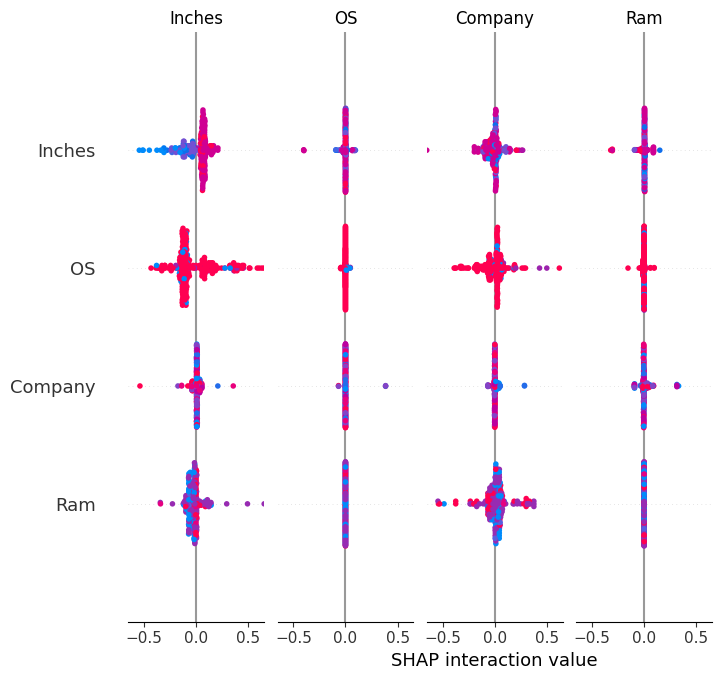

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Załaduj dane
data = pd.read_csv("model_data.csv")  # Wprowadź właściwą ścieżkę

# Zakodowanie etykiet dla kolumny 'TypeName'
y_classification = data['TypeName'].astype('category').cat.codes
X_classification = data.drop(columns=['TypeName'])

# Podział danych na zbiory treningowy i testowy
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Trenowanie modelu dla pełnego zestawu cech
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Inicjalizacja GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5
)

# Dopasowanie najlepszego modelu
grid_search.fit(X_train_cls, y_train_cls)
best_classifier = grid_search.best_estimator_

# Ocena dokładności na zbiorze testowym
y_pred_cls = best_classifier.predict(X_test_cls)
print("\nDokładność modelu klasyfikacyjnego:", accuracy_score(y_test_cls, y_pred_cls))

# Tworzenie próbki referencyjnej
background_top = X_train_cls.sample(100, random_state=42)

# Tworzenie wyjaśniacza SHAP z pełnym zestawem cech
classification_explainer = shap.TreeExplainer(best_classifier, background_top)

# Obliczenie wartości SHAP
classification_shap_values = classification_explainer.shap_values(X_test_cls)

# Debugging: Wyświetlenie kształtów
print("\nKształty wartości SHAP dla każdej klasy:")
for i, sv in enumerate(classification_shap_values):
    print(f"Klasa {i} - Kształt shap_values: {sv.shape}")

print(f"Kształt danych testowych (X_test_cls): {X_test_cls.shape}")

# Alternatywa: użycie KernelExplainer
kernel_explainer = shap.KernelExplainer(best_classifier.predict_proba, background_top)
kernel_shap_values = kernel_explainer.shap_values(X_test_cls)

# Debugowanie wyników KernelExplainer
print("\nKształty wartości KernelExplainer SHAP dla każdej klasy:")
for i, sv in enumerate(kernel_shap_values):
    print(f"Klasa {i} - Kształt kernel_shap_values: {sv.shape}")

# Generowanie wykresu sumarycznego z KernelExplainer
shap.summary_plot(kernel_shap_values, X_test_cls, plot_type="bar")
plt.show()
